# Visualizing fire scars through false color

**Author:** Aakriti Poudel

**GitHub Repository:** https://github.com/aakriti-poudel-chhetri/eds220-hwk4

## 1. About this notebook

### Purpose

The purpose of the task in this notebook is to produce a false-color image of the Eaton and Palisades Fires using remote sensing data, highlighting the burn scar and demonstrating how coding and data visualization support environmental monitoring.

### Highlights
The key highlights of this assignment is to:

- Explore NetCDF data, xarray and restore geospatial information
- Map a True color image
- Map a False color image
- Map the Eaton and Palisades fire boundaries using false-color satellite imagery

### About the data

In this task, we will work with two datasets:

#### **First Dataset: Simplified collection of bands from the Landsat Collection 2 Level-2**

The first dataset is a simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite.

The data was retrieved from the Microsoft Planetary Computer data catalogue and clipped to an area surrounding the fire perimeters.

- **Data Source:** [Microsoft Planetary Computer data catalogue](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2)
- **Data Access:** November 15, 2025

#### **Second Dataset: Fire perimeters for the Eaton and Palisades fires**

The second dataset is dissolved fire perimeters/boundaries for Eaton and Palisades fires. The data can be accessed from the [link](https://data.lacounty.gov/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about).

- **Data Source:** [County of Los Angeles Open Data](https://data.lacounty.gov/)
- **Data Access:** November 15, 2025

### References

*Landsat Collection 2 Level-2*. Microsoft Planetary Computer. Retrieved 15 Nov, 2025. https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2.

*Palisades and Eaton Dissolved Fire Perimeters*. (2025) County of Los Angeles Open Data. https://data.lacounty.gov/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about.

*Why Is That Forest Red and That Cloud Blue?*. (2014, March 4). NASA Earth Observatory. https://earthobservatory.nasa.gov/features/FalseColor.

*What Are the Band Designations for the Landsat Satellites?*.(2025, July 11). U.S. Geological Survey. https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites.

*Common Landsat Band Combinations*. (2021, November 12). U.S. Geological Survey. https://www.usgs.gov/media/images/common-landsat-band-combinations

## 2. Fire perimeter data exploration

Explore the fire perimeter data and write a brief summary of the information you obtained from the preliminary exploration.

### Import data  
- Import the Fire perimeters for the Eaton and Palisades fires data as a variable named `eaton` and `palisades` respectively.

Construct file paths using the `os` package to access the data.

In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

Read the Eaton fire dataset.

In [2]:
# Define the file path
fp_1 = os.path.join('data', 'Eaton_Perimeter_20250121')

# Use geopandas.read_file() to read the file
eaton = gpd.read_file(fp_1)
eaton.head()

,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,2206.265625,270.199719,"POLYGON ((-13146936.686 4051222.067, -13146932..."
1,2,Heat Perimeter,20710.207031,839.204218,"POLYGON ((-13150835.463 4052713.929, -13150831..."
2,3,Heat Perimeter,3639.238281,250.304502,"POLYGON ((-13153094.697 4053057.596, -13153113..."
3,4,Heat Perimeter,1464.550781,148.106792,"POLYGON ((-13145097.740 4053118.235, -13145100..."
4,5,Heat Perimeter,4132.753906,247.960744,"POLYGON ((-13153131.126 4053196.882, -13153131..."


Explore the Eaton fire dataset.

In [3]:
# Check summary of the DataFrame
eaton.info()

# Check CRS of the dataset
print(eaton.crs)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    20 non-null     int64   
 1   type        20 non-null     object  
 2   Shape__Are  20 non-null     float64 
 3   Shape__Len  20 non-null     float64 
 4   geometry    20 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 932.0+ bytes
EPSG:3857


Read the Palisades fire dataset.

In [4]:
# Define the file path
fp_2 = os.path.join('data', 'Palisades_Perimeter_20250121')

# Use geopandas.read_file() to read the file
palisades = gpd.read_file(fp_2)
palisades.head()

,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,1182.082031,267.101144,"POLYGON ((-13193543.302 4032913.077, -13193543..."
1,2,Heat Perimeter,2222.488281,185.498783,"POLYGON ((-13193524.155 4033067.953, -13193524..."
2,3,Heat Perimeter,21.011719,22.412814,"POLYGON ((-13193598.085 4033158.222, -13193598..."
3,4,Heat Perimeter,214.992188,76.639180,"POLYGON ((-13193654.249 4033146.033, -13193656..."
4,5,Heat Perimeter,44203.453125,1569.259764,"POLYGON ((-13194209.580 4033236.320, -13194209..."


Explore the Palisades fire dataset.

In [5]:
# Check summary of the DataFrame
palisades.info()

# Check CRS of the dataset
print(palisades.crs)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    21 non-null     int64   
 1   type        21 non-null     object  
 2   Shape__Are  21 non-null     float64 
 3   Shape__Len  21 non-null     float64 
 4   geometry    21 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 972.0+ bytes
EPSG:3857


#### A brief summary of the datasets

The `eaton` and `palisades` datasets both have 5 columns (`OBJECTID`, `type`, `Shape_Are`, `Shape_Len` and `geometry`) with the same data types. The data types used are appropriate for all values in their respective columns. There is no missing data in the column. 
There are 20 rows in `eaton` dataset and 21 rows in `palisades` dataset.

Both of the dataset has same `CRS (EPSG:3857)`, which is **projected coordinate system** that uses the Mercator projection to display the spherical Earth on a flat map.

## 3. NetCDF data import and exploration

- Import the Landsat data using xr.open_dataset().

- Explore the data and write a brief summary of the information you obtained from the preliminary information. Your summary should include the a description of the data’s variables, dimensions, and coordinates.

Read the NetCDF dataset.

In [6]:
# Define the file path
fp = os.path.join('data', 'landsat8-2025-02-23-palisades-eaton.nc')

# Import the Landsat data using xr.open_dataset()
try:
    landsat = xr.open_dataset(fp)
    print("✅ Data imported successfully!")
    print(landsat)

except FileNotFoundError:
    print(f"❌ Error: File '{file_name}' not found. Check the file path.")

except Exception as e:
    print(f"❌ An error occurred during import: {e}")

✅ Data imported successfully!
<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...


#### A brief summary of the NetCDF dataset

This dataset is a **remote sensing raster dataset** loaded as `xarray.Dataset`. The total size of the dataset is 78MB. The dataset exploration gave an information on dimensions, coordinates nad data variables.

There are two spatial dimensions on dataset. The (y: 1418) represents the vertical spatial dimension (rows) and (x: 2742) represents the horizontal spatial dimension (columns).

The dataset has coordinate arrays for both x and y, stored as float64 values that corresponds to their respective spatial map coordinates. There is a only one time coordinate stored as datetime64[ns], that indicates when the image was taken.

There are five different spectral bands: red, green, blue, nir08 and swir22, and they have the same pixel grid (float32). A spatial_ref variable is also included to store the map projection information.

## 4. Restoring geospatial information

Check the coordinate reference system of the landsat data and transform as necessary.

a. Use `rio.crs` to print what is the CRS of this dataset. Is this a geospatial object?

In [7]:
# Check CRS of the dataset
print(landsat.rio.crs)

None


In [8]:
# Check CRS on each coordinate
print(landsat.x.rio.crs)
print(landsat.y.rio.crs)

EPSG:32611
EPSG:32611


b. Print the CRS by using accesing the `spatial_ref.crs_wkt` attribute of the dataset.

In [9]:
# Print CRS of the dataset
print(landsat.spatial_ref.crs_wkt)

PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]


c. Recover the geospatial information by using `rio.write_crs()` and the spatial reference information from part b.

In [10]:
# Recover the geospatial information
print(landsat.rio.write_crs(landsat.spatial_ref.crs_wkt, inplace=True))

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...


d. Print the CRS of the updated dataset.

In [11]:
# Print the CRS of the updated dataset
print(landsat.rio.crs)

EPSG:32611


## 5. True color image

To create a True color image, follow the followin steps:

a. Without creating any new variables:
- select the red, green, and blue variables (in that order) of the `xarray.Dataset` holding the Landsat data,
- convert it to a `numpy.array` using the `to_array()` method, and then
- use `.plot.imshow()` to create an RGB image with the data. There will be two warnings, that’s ok.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


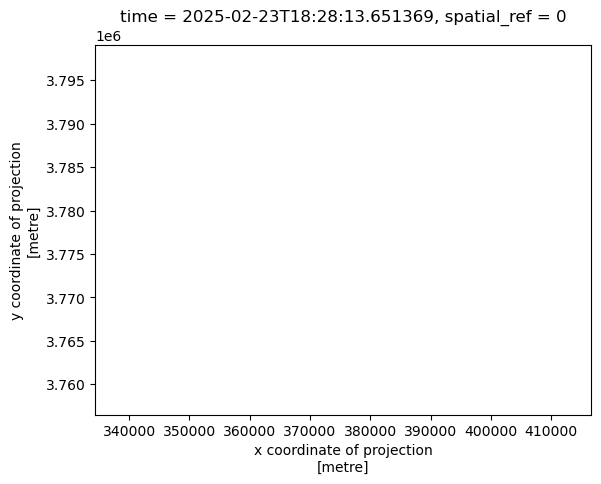

In [12]:
# Select the red, green and blue variables, convert it to a numpy.array and create an RGB image
landsat[['red', 'green', 'blue']].to_array().plot.imshow()

b. Adjust the scale used for plotting the bands to get a true color image. HINT: Check the robust parameter. *The issue here is the clouds: their RGB values are outliers and cause the other values to be squished when plotting.*

/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


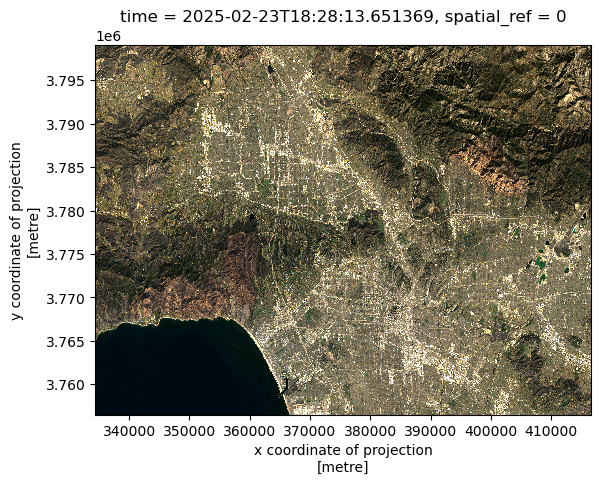

In [13]:
# Adjust the scale used for plotting the bands
landsat[['red', 'green', 'blue']].to_array().plot.imshow(robust = True)

c. To resolve the other warning, identify which bands have `nan` values. HINT: There are many ways of doing so. One option is to use `numpy.isnan()`.

In [14]:
# Identify 'nan' values in bands
for i in ['red', 'green', 'blue']:
    # .isnull() creates a boolean array (True where NaN)
    # .sum() sums the True values (counts the NaNs)
    # .item() converts the single result to a standard Python integer
    nan_count = landsat[i].isnull().sum().item()
    print(f"The {i} band has {nan_count} Nan values.")

The red band has 0 Nan values.
The green band has 1 Nan values.
The blue band has 109 Nan values.


d. Use the `.fillna()` mehtod for `xarray.Datasets` to substitute the any `nan` values in the Landsat data for zero.

In [15]:
# Substitute any 'nan' values in the Landsat data for zero
landsat = landsat.fillna(0)

e. Create a new true color image that gets plotted without warnings.

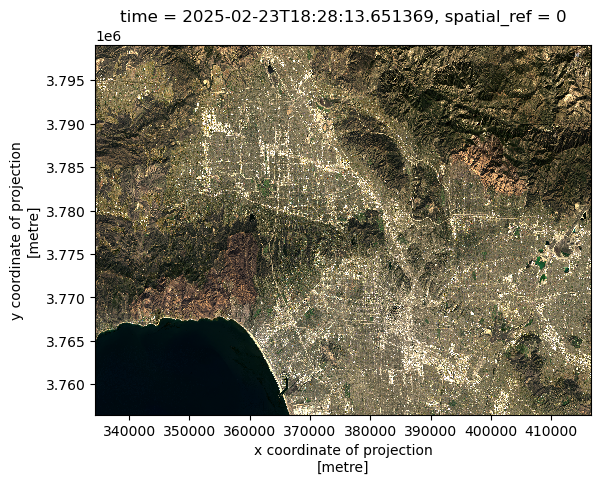

In [16]:
# Create a new true color image without warnings
landsat[['red', 'green', 'blue']].to_array().plot.imshow(robust = True)

#### A brief explanation comparing the ouputs for parts (a) and (e).

The first true color image (part a) was plotted directly from the red, green and blue bands without modifying the dataset. The image worked, but we got warnings because some of the data had Nan (missing) values. These missing values caused problems during plotting. Additionally, due to the presence of very bright cloud pixels, many of the other colors appeared darker or washed out, even when using the robust=True to ignore extreme outliers.

In part (part e), we replaced all Nan values with zeros before plotting again. This removed the missing values issue allowing the plot to scale the data more smoothly. So, the second true color image displayed without warnings. The second true color image looks cleaner and has better contrast. It doesn’t have the plotting problems seen in the first image.

## 6. False color image
Without creating any new variables, create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

In [17]:
# Print all data variable in the landsat dataset
print(list(landsat.data_vars))

['red', 'green', 'blue', 'nir08', 'swir22']


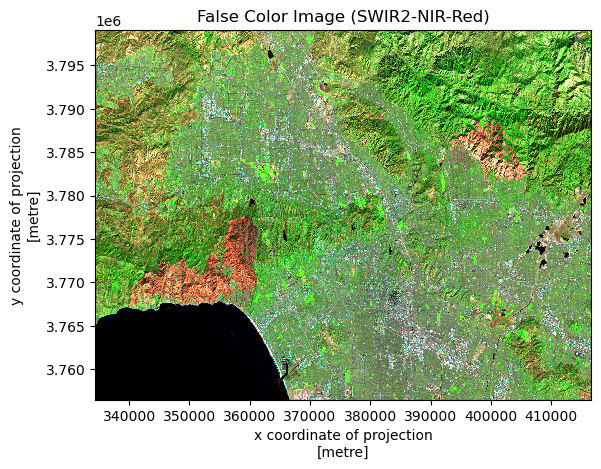

In [18]:
# Create false color image (SWIR2, NIR, Red)
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust = True)
plt.title('False Color Image (SWIR2-NIR-Red)')
plt.show()

## 7. Map
a. Create a map showing the shortwave infrared/near-infrared/red false color image together with both fire perimeters. Customize it appropriately including, at least, an informative title and legend. You may also want to include text on the map to identify which fire is which.

In [19]:
# Combine the two fire perimeter datasets into a single GeoDataFrame
fires = pd.concat([eaton, palisades], ignore_index = True)

# Convert CRS of the Eaton and Palisades fire perimeter to landsat dataset CRS
fires = fires.to_crs('epsg:32611')

Check and ensure that the CRS is same before plotting.

In [20]:
# Check The CRS of the combined dataset
fires.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Check the fires dataset for plotting

In [21]:
#Check the fires dataset for adjusting index and fires name
fires

,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,2.206266e+03,270.199719,"POLYGON ((398527.261 3781198.912, 398530.857 3..."
1,2,Heat Perimeter,2.071021e+04,839.204218,"POLYGON ((395312.735 3782463.832, 395315.941 3..."
2,3,Heat Perimeter,3.639238e+03,250.304502,"POLYGON ((393445.519 3782768.065, 393430.055 3..."
3,4,Heat Perimeter,1.464551e+03,148.106792,"POLYGON ((400066.534 3782745.299, 400064.171 3..."
4,5,Heat Perimeter,4.132754e+03,247.960744,"POLYGON ((393416.663 3782883.189, 393416.667 3..."
5,6,Heat Perimeter,8.345547e+02,107.859955,"POLYGON ((398066.262 3783029.814, 398060.585 3..."
6,7,Heat Perimeter,2.881172e+02,70.041598,"POLYGON ((397420.986 3783149.821, 397420.996 3..."
7,8,Heat Perimeter,2.879512e+03,275.409855,"POLYGON ((398103.249 3783218.244, 398105.393 3..."
8,9,Heat Perimeter,8.388641e+04,1880.918469,"POLYGON ((395162.001 3783279.320, 395165.393 3..."
9,10,Heat Perimeter,6.839698e+04,1518.792972,"POLYGON ((393386.842 3783331.694, 393386.956 3..."


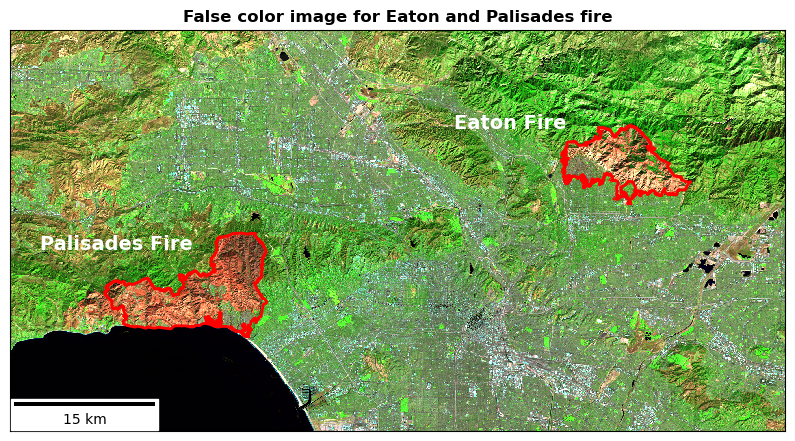

In [22]:
# Initialize the map
fig, ax = plt.subplots(figsize = (10, 8))

# Plot the false color map
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust = True,
                                                           ax = ax,
                                                           add_colorbar = False)

# Plot fires perimeter on false color map
fires.boundary.plot(ax = ax, color = 'red', linewidth = 2)

# Add text for first fire (adjust index and name as needed)
ax.text(fires.geometry.centroid.x.values[0] - 11000, fires.geometry.centroid.y.values[0] + 8000, 'Eaton Fire',
        fontsize = 14, weight = 'bold', color = 'white', ha = 'center', va = 'center')

# Add text for second fire (adjust index and name as needed)
ax.text(fires.geometry.centroid.x.values[-1] - 9000, fires.geometry.centroid.y.values[-1] + 5000, 'Palisades Fire', 
        fontsize = 14, weight = 'bold', color = 'white', ha = 'center', va= 'center')

# Add title to the map
plt.title('False color image for Eaton and Palisades fire', fontsize = 12, weight = 'bold')

# Remove axes ticks
ax.set_xticks([])  
ax.set_yticks([])  

# Remove axes labels
ax.set_xlabel("")  
ax.set_ylabel("")

# Add a scalebar
ax.add_artist(ScaleBar(1, box_color="white",location="lower left"))

plt.show()

b. Write a figure description for the map including a brief explanation of how false color imagery is being used.

#### Description for the map including a brief explanation of how false color imagery is being used

This map shows a false color image made from Landsat data for Eaton and Palisades fire of the Los Angeles County. The map uses three bands: SWIR2, NIR and Red, assigned to the red, green and blue color channels. In this image, vegetation looks green because they reflect a lot of near-infrared light. The fire burned areas and bare ground looks brown. The urban areas usually appear purple or gray. The water looks black. The boundaries of the Eaton Fire and Palisades fire are delineated with red outlines. Each fire is labeled.

This combination of bands is useful for spotting burn scars and understanding fire damage because SWIR2 reacts strongly to moisture changes, and NIR highlights how healthy the vegetation is. Together, these bands make it easy to see where fires have changed the landscape.